
# <h1 align="center"> <font color='royalblue'><font size=6>Aerofit -  Descriptive Statistics & Probability</font> </font></h1>

<h2 align='right'>- <font color='green'><b> Vijay Kumar</b></font></h2>

##  What is Aerofit?


`Aerofit`, a dynamic player in the fitness industry, traces its origins to `M/s. Sachdev Sports Co`, established in `1928` by `Ram Ratan Sachdev`. From its modest beginnings in `Hyderabad`, India, the company evolved into a leading sports equipment supplier across Andhra Pradesh and Telangana. Recognizing the growing need for fitness solutions, M/s. Sachdev Overseas emerged to import quality fitness equipment under the "Aerofit" brand, ensuring affordability and post-sales excellence.

Driven by a dedication to innovation, `Nityasach Fitness Pvt Ltd` was founded, spearheaded by director `Nityesh Sachdev`. With the brand "Aerofit" at its core, the company aimed to bridge the gap between international fitness technology and the Indian market. By importing advanced fitness equipment at accessible price points, Aerofit sought to redefine the industry landscape, prioritizing health and vitality while staying true to its legacy of passion and customer focus.

Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

## 🎯 Objective

Create comprehensive customer profiles for each AeroFit treadmill product through descriptive analytics. Develop two-way contingency tables and analyze conditional and marginal probabilities to discern customer characteristics, facilitating improved product recommendations and informed business decisions.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import poisson, binom,expon,norm,gamma,geom


In [ ]:
data=pd.read_csv('/content/aerofit_treadmill.csv')


We have been Given data of "Aerofit" treadmill sales with the data consisting sale of 3 products
  * KP281- Entry level treadmill priced at $1500

  * KP481- Intermediate level treadmill at $1750
  
  * KP781- Advance level treadmill at $2500

In [ ]:
#@title 1. Preliminary Analysis
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
data.shape

(180, 9)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
data.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,180.00,180.00,180.00,180.00,180.00,180.00
mean,28.79,15.57,3.46,3.31,53719.58,103.19
std,6.94,1.62,1.08,0.96,16506.68,51.86
min,18.00,12.00,2.00,1.00,29562.00,21.00
25%,24.00,14.00,3.00,3.00,44058.75,66.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,58668.00,114.75
max,50.00,21.00,7.00,5.00,104581.00,360.00


In our initial analysis we found that there are no null values in the data and no duplicates have been found either.
There are a total of 180 products sold totally, and the key observations are

*   There are 3 different objects
*   KP281 is the highest sold object
*   Men have bought the most at 104 pieces of the product
*   People with Marital Status as Partnered have bought 107 of the 180 treadmills
*   Average age of people who bought treadmills is 28
*   Average income of customers is $53700
*   Customers run 103 miles per week on an average



<Axes: ylabel='Miles'>

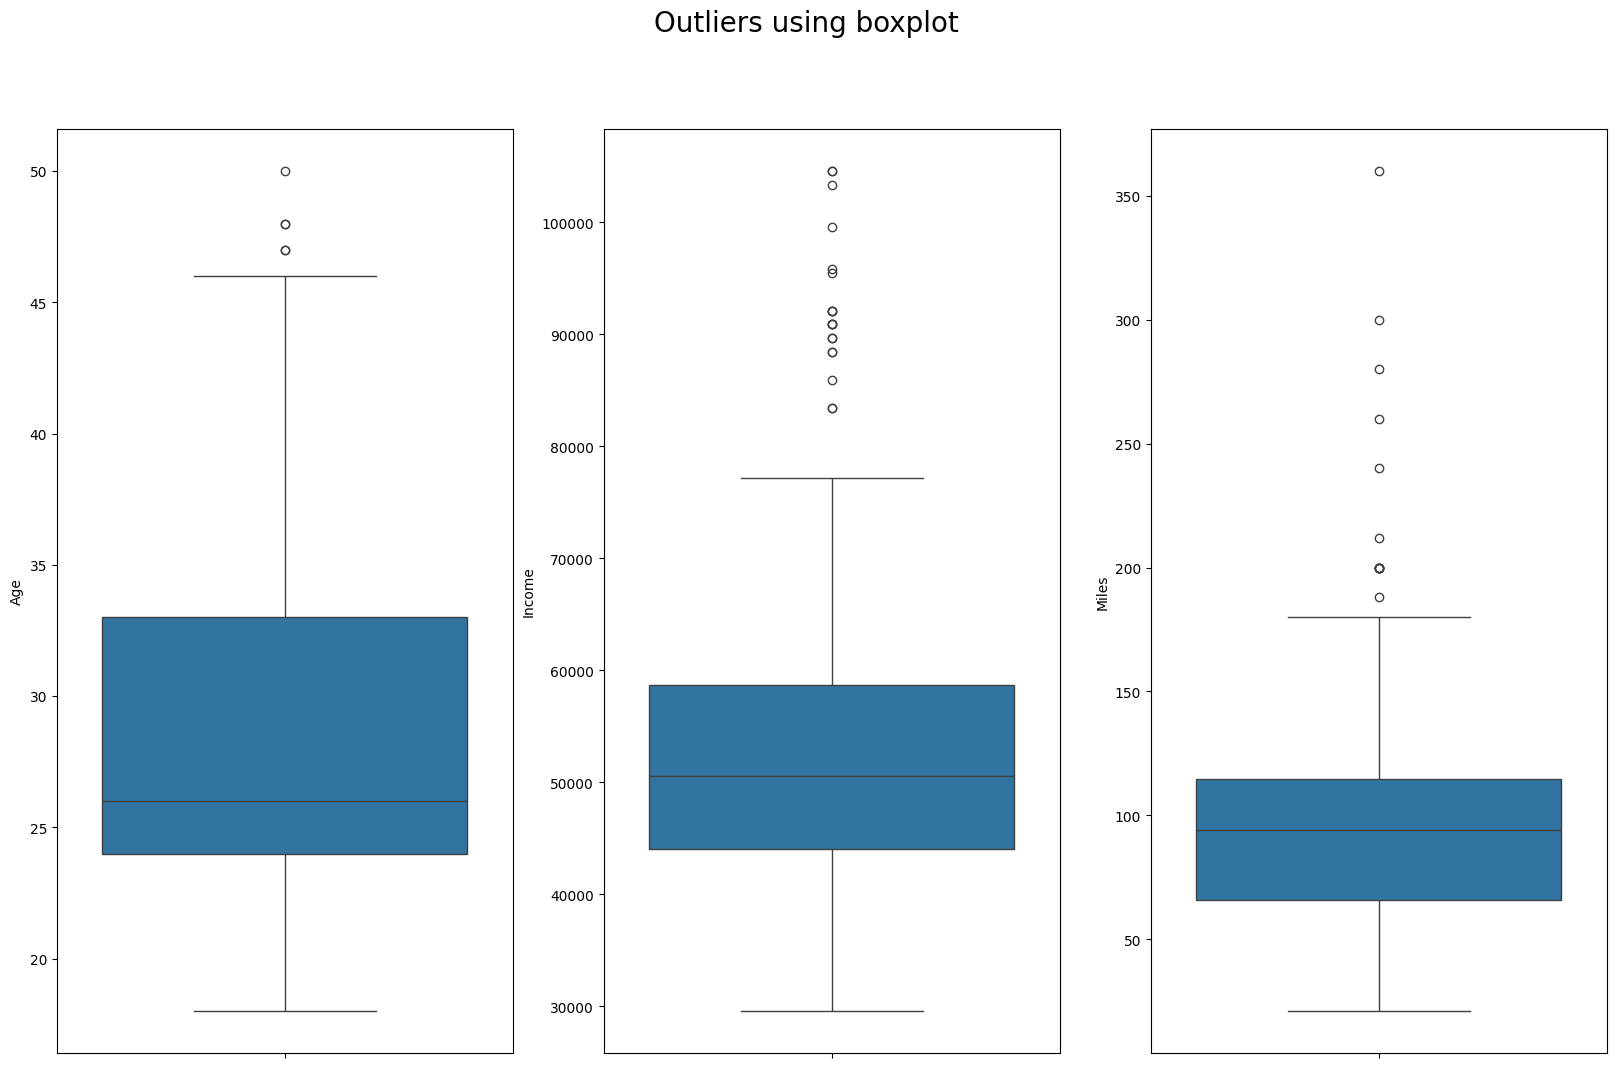

In [ ]:
#@title 2. Detecting outliers
plt.figure(figsize=(20,12)).suptitle("Outliers using boxplot",fontsize=20)

plt.subplot(1,3,1)
sns.boxplot(data['Age'])

plt.subplot(1,3,2)
sns.boxplot(data['Income'])

plt.subplot(1,3,3)
sns.boxplot(data['Miles'])


The above graph shows that we have a good no of outliers in the Income column which could lead the data to become skewed, so we are going to keep only the values between 5-95 percentiles  

In [ ]:
#@title Clipping between 5-95 percentile

numerical_data = data.select_dtypes(include='number')

percentiles = numerical_data.quantile([0.05, 0.95])
percentiles

data = data[
    (data['Income'] >= percentiles.loc[0.05, 'Income']) & (data['Income'] <= percentiles.loc[0.95, 'Income'])
]

In [ ]:
data.shape

(162, 9)

In [ ]:
data.describe().round(2)

,Age,Education,Usage,Fitness,Income,Miles
count,162.00,162.00,162.00,162.00,162.00,162.00
mean,28.91,15.57,3.43,3.24,52474.44,100.41
std,6.58,1.54,1.07,0.92,12855.65,48.08
min,20.00,12.00,2.00,1.00,34110.00,21.00
25%,24.00,14.00,3.00,3.00,45480.00,68.00
50%,26.00,16.00,3.00,3.00,50596.50,94.00
75%,33.00,16.00,4.00,4.00,57808.00,113.00
max,50.00,21.00,7.00,5.00,90886.00,300.00


The above Data has been filtered to remove the outliers and values within 5th & 95th Percentile only has been retained.
Using this data we create new columns by converting continuous values into categorical values for analysis

**Converting Continuos values into Categorical values**

We are creating new columns using these existing columns so they can be used as categorical values for the analysis.

1. Age:- Age_group
  
  * we have created new age ranges with 4 different buckets for the ages to be put in
    * 17-25
    * 25-35
    * 35-45
    * 45 and above

2. Education:- Education_group

  * 3 buckets have been created for people with different levels of education

    * Primary-upto 12th
    * Secondary-upto 15th
    * Graduate-15 and above

3. Income:- Income_group

  * customers have been classified into 4 different income groups

    * Low- upto $40000
    * Medium- upto $60000
    * High- upto $80000
    * Very High- above $80000

4. Miles:- Miles_group

  * Customers have been put into 4 different categories based how many miles they run per week

    * <75 - less than 75 miles per week
    * 75-150 - Between 75-150 miles per week
    * 150+ - More than 150 miles per week




In [ ]:
bin1=[17,25,35,45,float('inf')]
bin_labels1=['17-25','25-35','35-45','45+']
data['Age_group']=pd.cut(data['Age'],bins=bin1,labels=bin_labels1)

In [ ]:
bin2=[0,12,15,float('inf')]
bin_labels2=['Primary','Secondary','Graduate']
data['Education_group']=pd.cut(data['Education'],bins=bin2,labels=bin_labels2)

In [ ]:
bin3=[0,40000,60000,80000,float('inf')]
bin_labels3=['Low','Medium','High','Very High']
data['Income_group']=pd.cut(data['Income'],bins=bin3,labels=bin_labels3)

In [ ]:
bin5=[0,75,150,float('inf')]
bin_labels5=['<75','75-150','150+']
data['Miles_group']=pd.cut(data['Miles'],bins=bin5,labels=bin_labels5)

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Education_group,Income_group,Miles_group
4,KP281,20,Male,13,Partnered,4,2,35247,47,17-25,Secondary,Low,<75
6,KP281,21,Female,14,Partnered,3,3,35247,75,17-25,Secondary,Low,<75
8,KP281,21,Male,15,Single,5,4,35247,141,17-25,Secondary,Low,75-150
9,KP281,21,Female,15,Partnered,2,3,37521,85,17-25,Secondary,Low,75-150
10,KP281,22,Male,14,Single,3,3,36384,85,17-25,Secondary,Low,75-150


In [ ]:
#@title  Graphical Analysis

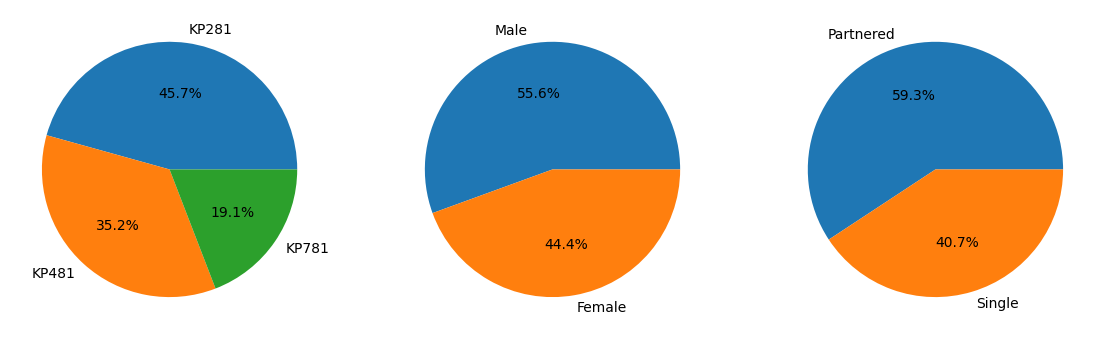

In [ ]:
plt.figure(figsize=(14,12))
#plt.suptitle("Product,Gender and marital distribution",fontsize=16)

plt.subplot(1,3,1)
plt.pie(data['Product'].value_counts(),labels=data['Product'].unique(),autopct='%1.1f%%')



plt.subplot(1,3,2)
plt.pie(data['Gender'].value_counts(),labels=data['Gender'].unique(),autopct='%1.1f%%')



plt.subplot(1,3,3)
plt.pie(data['MaritalStatus'].value_counts(),labels=data['MaritalStatus'].unique(),autopct='%1.1f%%')

plt.show()

* We can see that KP281 has the highest market share with 45.7% of total products sold
* 55.6% of Customers are men
* Almost 60% of the customers have a partner


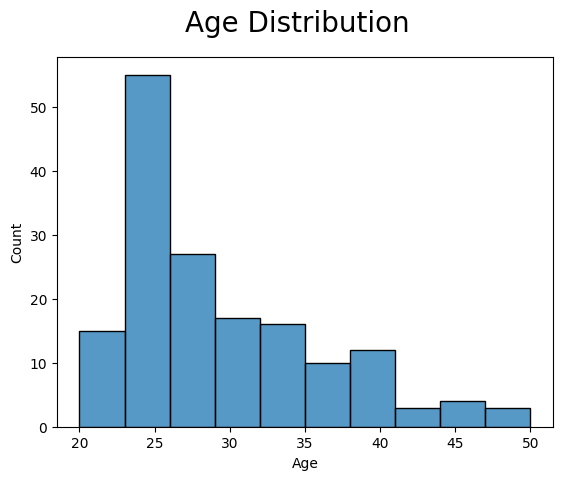

In [ ]:
plt.suptitle("Age Distribution",fontsize=20)
sns.histplot(data['Age'])
plt.show()

Most of the customers are around the age of 25 with the highest being below 25 and above 17 years.

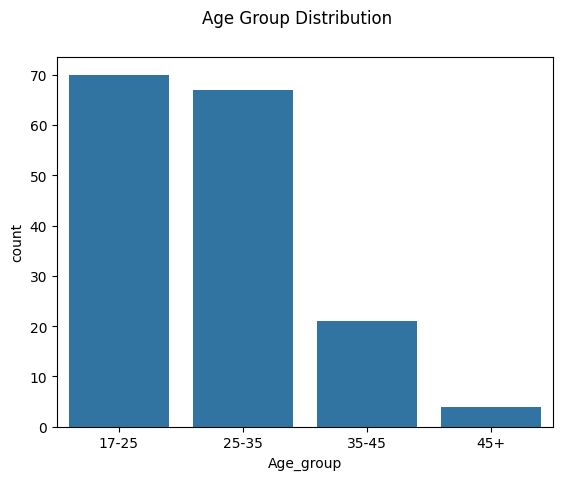

In [ ]:
plt.suptitle('Age Group Distribution')
sns.countplot(data=data,x='Age_group')
plt.show()

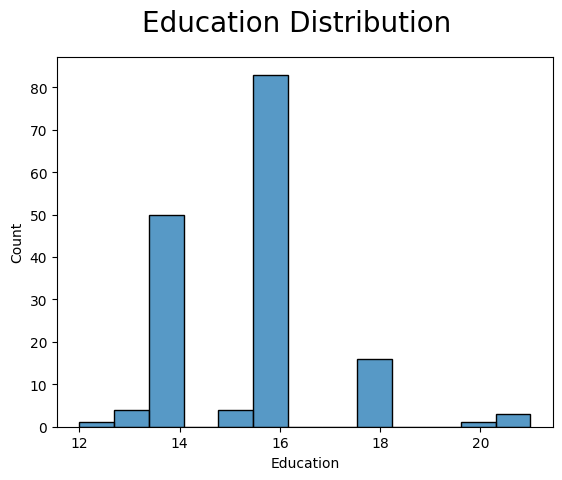

In [ ]:
plt.suptitle("Education Distribution",fontsize=20)
sns.histplot(data['Education'])
plt.show()

Most of the customers are above 15th level of education as most of them are graduates

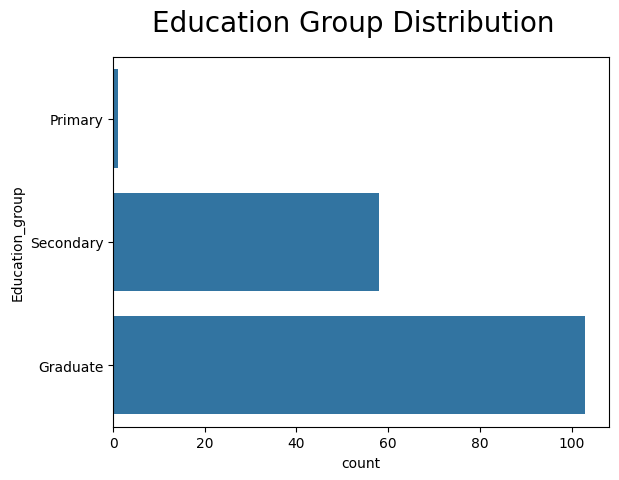

In [ ]:
plt.suptitle("Education Group Distribution",fontsize=20)
sns.countplot(data['Education_group'])
plt.show()

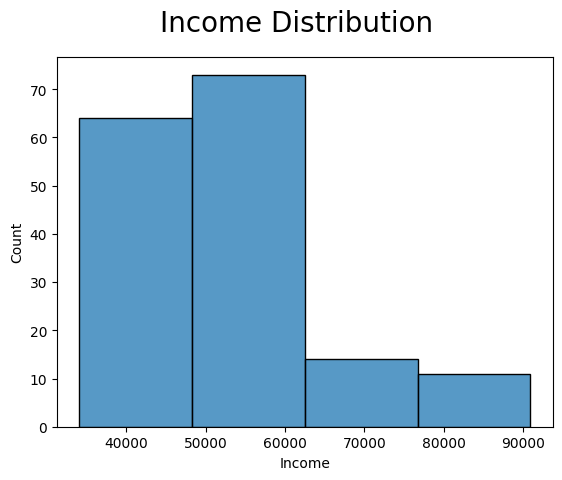

In [ ]:
plt.suptitle("Income Distribution",fontsize=20)
sns.histplot(data['Income'],bins=4)
plt.show()

Most of the customers fall in the medium income range with most of them earning between $50000-$60000

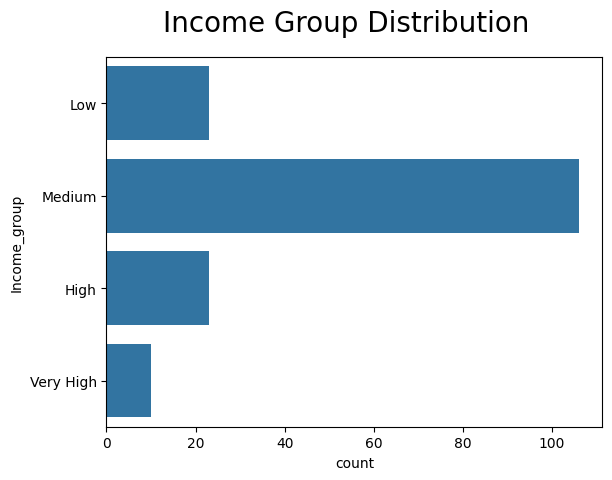

In [ ]:
plt.suptitle("Income Group Distribution",fontsize=20)
sns.countplot(data['Income_group'])
plt.show()

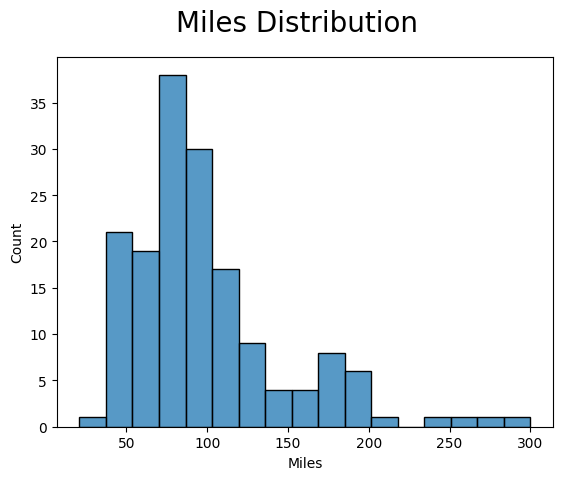

In [ ]:
plt.suptitle("Miles Distribution",fontsize=20)
sns.histplot(data['Miles'])
plt.show()

Customers who run between 75-150 miles per week are more compared to the ones who run less than 75 miles and higher than 150 miles

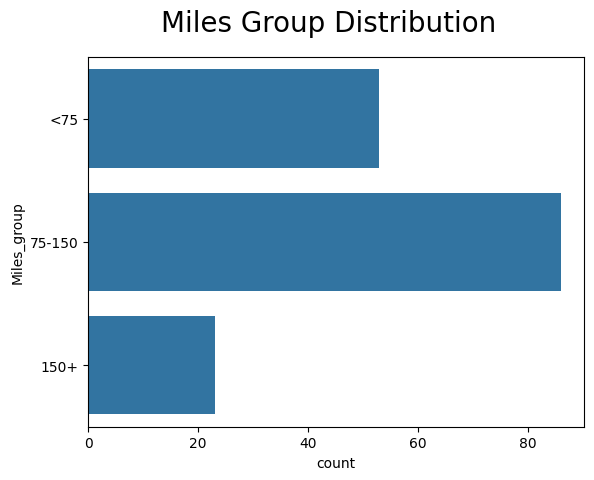

In [ ]:
plt.suptitle("Miles Group Distribution",fontsize=20)
sns.countplot(data['Miles_group'])
plt.show()

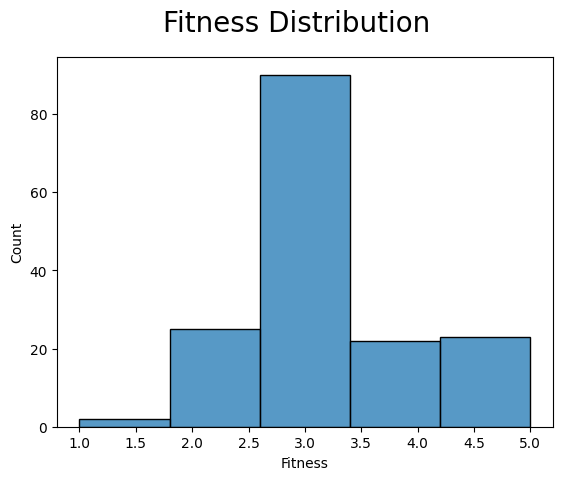

In [ ]:
plt.suptitle("Fitness Distribution",fontsize=20)
sns.histplot(data['Fitness'],bins=5)
plt.show()

Most of the customers classify themselves as being 3/5 on fitness scale

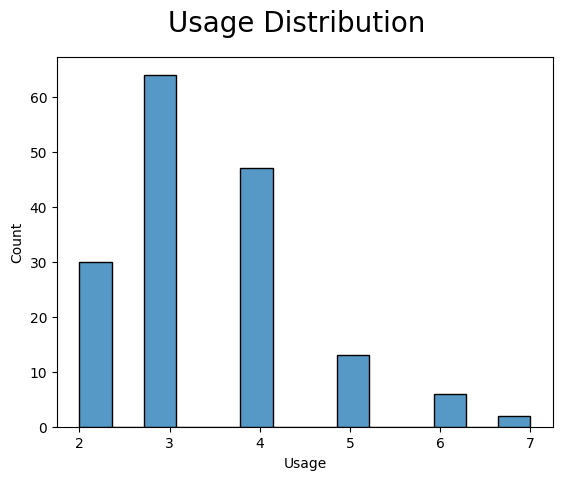

In [ ]:
plt.suptitle("Usage Distribution",fontsize=20)
sns.histplot(data['Usage'])
plt.show()

Customers who use the treadmill 3 times per week are the highest among all with a very low no of customers using 7 days of the week

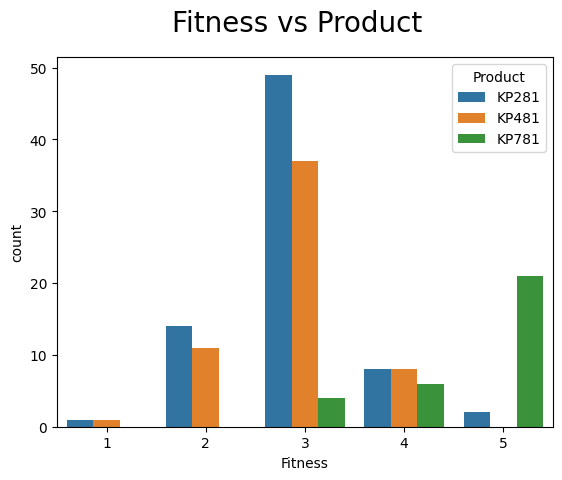

In [ ]:
plt.suptitle("Fitness vs Product",fontsize=20)
sns.countplot(data=data,x='Fitness',hue='Product')
plt.show()

As the fitness scale we can see the rise in usage of the most advanced product KP781 where as KP281 is the predominant one lower fitness levels

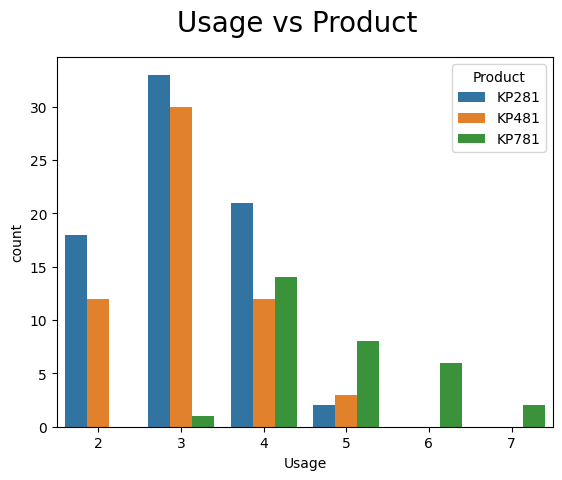

In [ ]:
plt.suptitle("Usage vs Product",fontsize=20)
sns.countplot(data=data,x='Usage',hue='Product')
plt.show()

As in the fitness levels here also the KP281 is predominant with users of lesser frequency and more frequent users are more inclined towards KP781

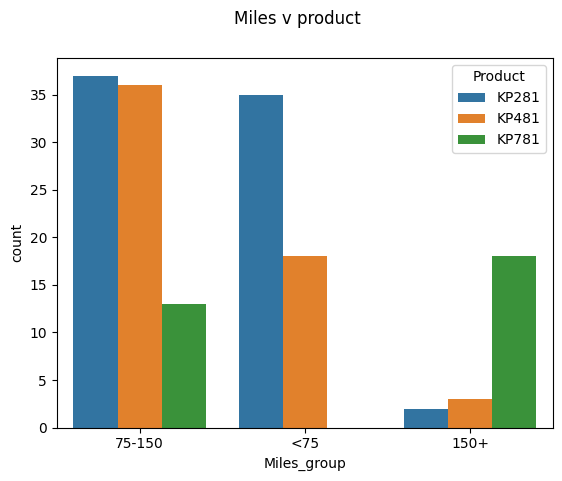

In [ ]:
plt.suptitle('Miles v product')
sns.countplot(data=data,x='Miles_group',order=data['Miles_group'].value_counts().index,hue='Product')
plt.show()

People who run more than 150 miles per week are more inclined to spend their money on the highest priced KP781 where as those run between 75-150 miles are equally probable to buy either of KP281 or KP481

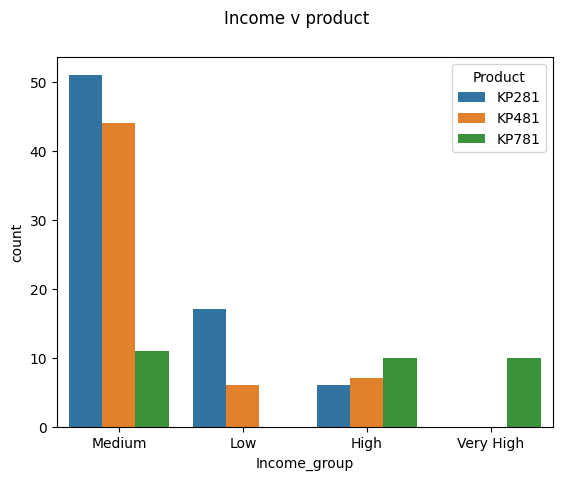

In [ ]:
plt.suptitle('Income v product')
sns.countplot(data=data,x='Income_group',order=data['Income_group'].value_counts().index,hue='Product')
plt.show()

Since the cost of KP281 is the lowest, people with lower income tend to buy it more but it is to be noted that KP481 is also popular with people  earning between $40000-$60000. Customers earning above $60000 are more likely to buy the costliest of all KP781

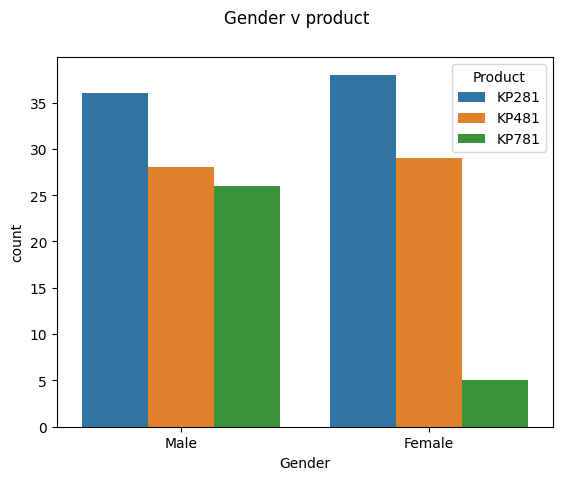

In [ ]:
plt.suptitle('Gender v product')
sns.countplot(data=data,x='Gender',order=data['Gender'].value_counts().index,hue='Product')
plt.show()

While there is not much disparity in the other 2 products, KP781 is predominantly bought by men and very less preferred by women

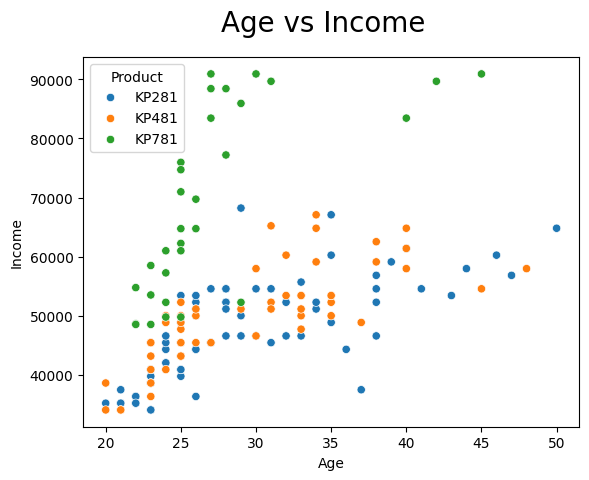

In [ ]:
plt.suptitle("Age vs Income",fontsize=20)
sns.scatterplot(data=data,x='Age',y='Income',hue='Product')
plt.show()

KP781 is bought mostly by people around 20-25 of age who also have a high income as the other two products do fairly well across all income and age range

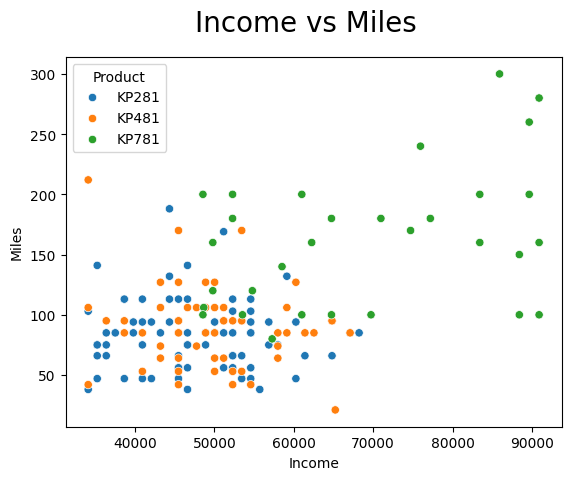

In [ ]:
plt.suptitle("Income vs Miles",fontsize=20)
sns.scatterplot(data=data,x='Income',y='Miles',hue='Product')
plt.show()

More the income and miles run more the chances that sales of KP781 will increase

In [ ]:
#@title 4. Correlation

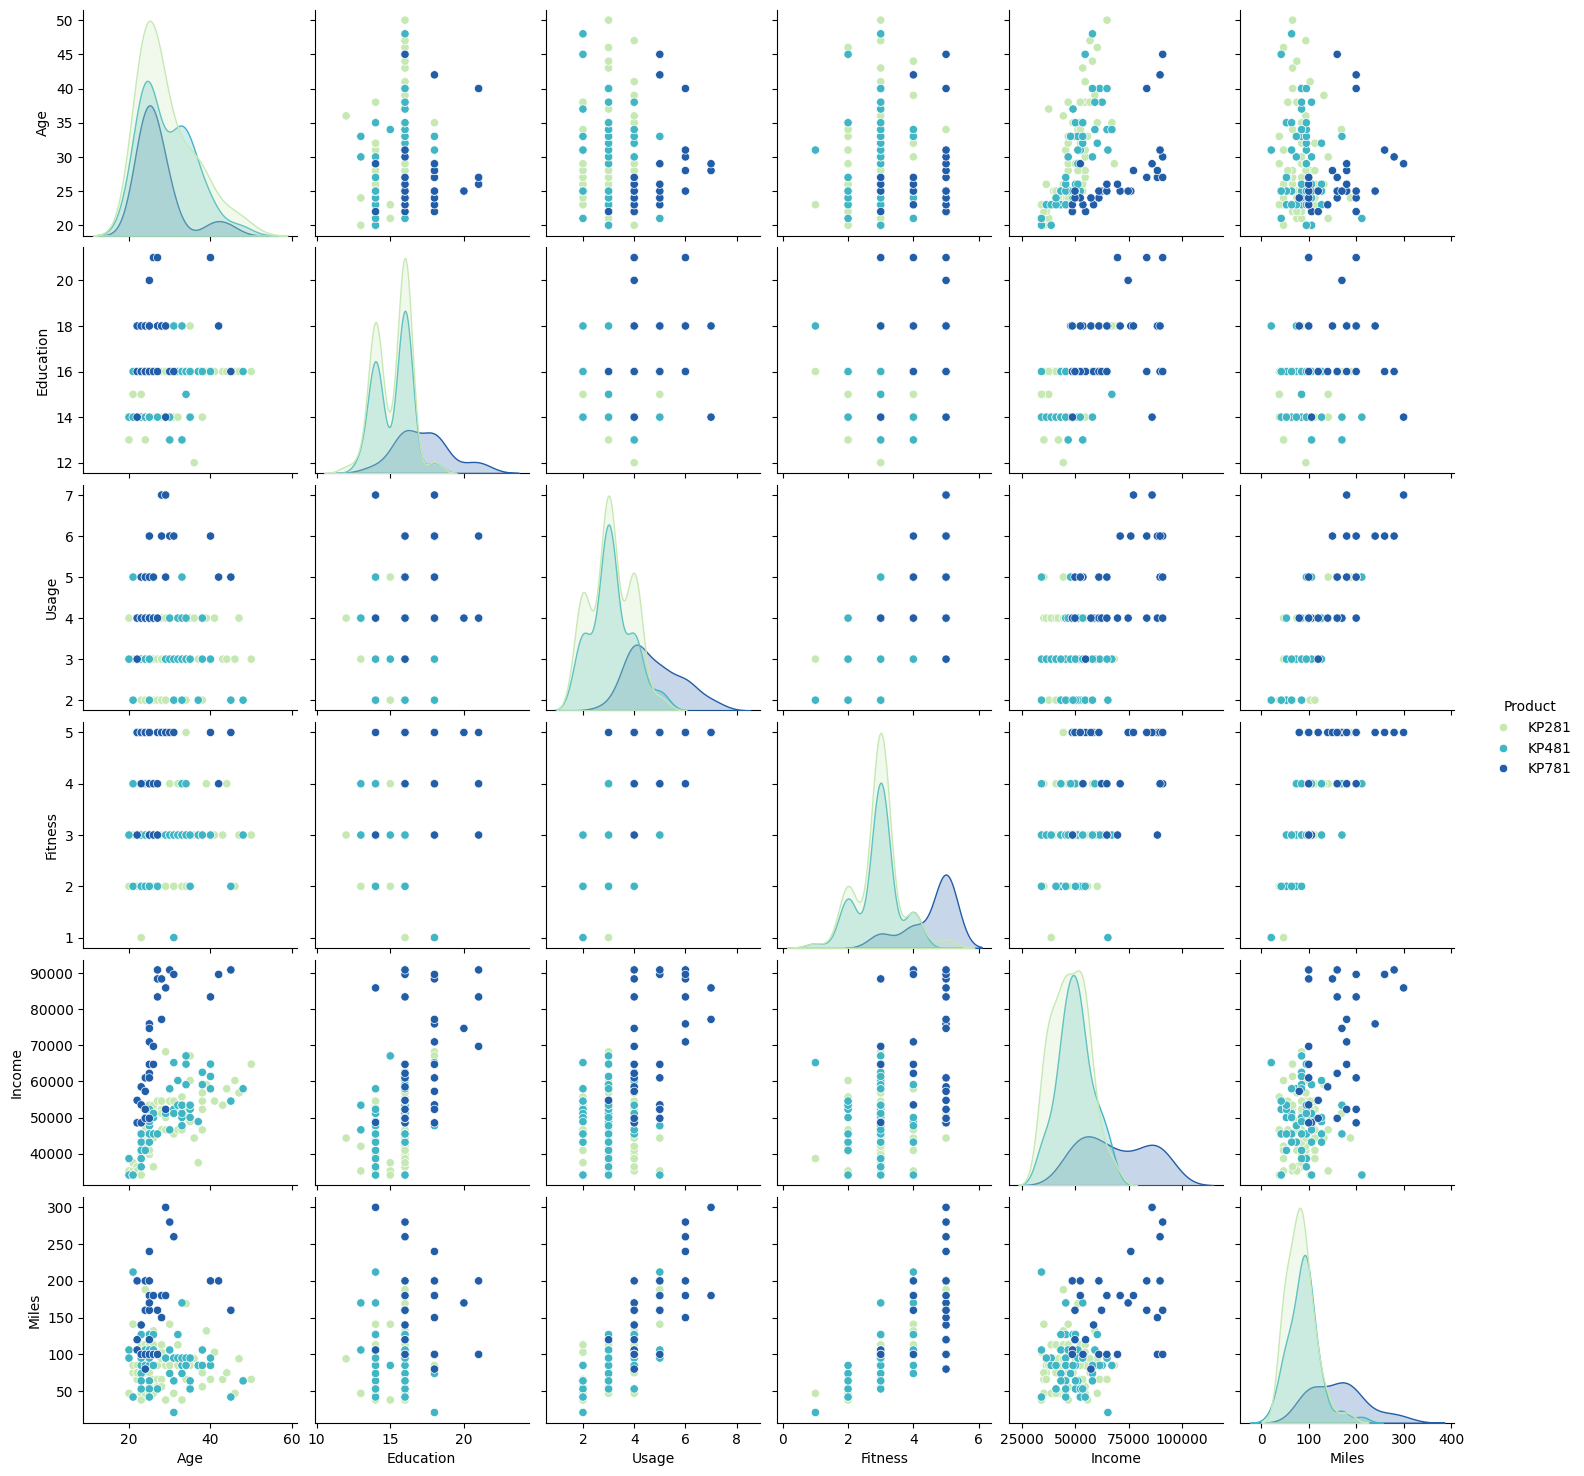

In [ ]:
sns.pairplot(data, hue ='Product', palette= 'YlGnBu')
plt.show()

In [ ]:
data['Usage'] = data['Usage'].astype('int')
data['Fitness'] = data['Fitness'].astype('int')

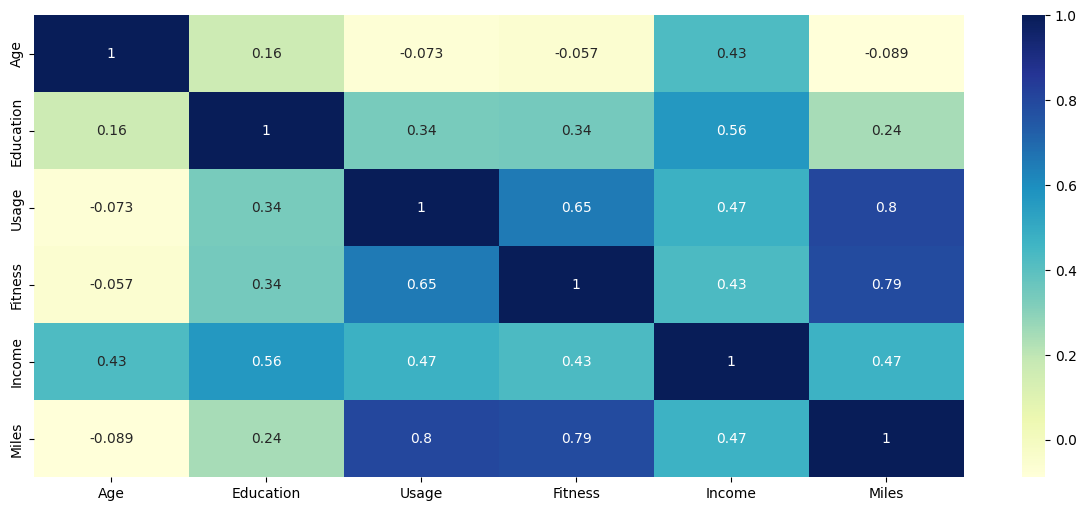

In [ ]:
corr_mat = data[['Age','Education','Usage','Fitness','Income','Miles']].corr()

plt.figure(figsize=(15,6))

sns.heatmap(corr_mat,annot = True, cmap="YlGnBu")

plt.show()




- From the pair plot we can see Age and Income are **positively correlated** and heatmap also suggests a **strong correlation** between them



- Eductaion and Income are highly correlated. Eductation also has significatnt correlation between Fitness rating and Usage of the treadmill.



- Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.

In [ ]:
#@title 5. Representing Probability
pd.crosstab(index=data['Product'],columns=data['Product'],margins=True,normalize=True).round(2)

Product,KP281,KP481,KP781,All
Product,,,,
KP281,0.46,0.00,0.00,0.46
KP481,0.00,0.35,0.00,0.35
KP781,0.00,0.00,0.19,0.19
All,0.46,0.35,0.19,1.00




*   46% of people buy the Beginner model KP281
*   35% of people buy the Intermediate model KP481
*   19% of people buy the Advance model KP781



In [ ]:
pd.crosstab(index=data['Product'],columns=data['Gender'],margins=True,normalize=True).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.23,0.22,0.46
KP481,0.18,0.17,0.35
KP781,0.03,0.16,0.19
All,0.44,0.56,1.00


1.   The Probability of treadmill being purchased by a female customer is 44%

    *   The conditional probability of purchasing the treadmill model given that the customer is female is
      *   For Treadmill model KP281 - 23%
      *   For Treadmill model KP481 - 18%
      *   For Treadmill model KP781 - 3%

2.   The Probability of treadmill being purchased by a male customer is 56%

    *   The conditional probability of purchasing the treadmill model given that the customer is male is
      *   For Treadmill model KP281 - 22%
      *   For Treadmill model KP481 - 17%
      *   For Treadmill model KP781 - 16%



In [ ]:
pd.crosstab(index=data['Product'],columns=data['Age_group'],margins=True,normalize=True).round(2)

Age_group,17-25,25-35,35-45,45+,All
Product,,,,,
KP281,0.17,0.20,0.07,0.02,0.46
KP481,0.15,0.15,0.04,0.01,0.35
KP781,0.10,0.07,0.02,0.00,0.19
All,0.43,0.41,0.13,0.02,1.00





1.   The Probability of treadmill being purchased by someone between 17-25 years of age is 43%

    *   The conditional probability of purchasing the treadmill model given that the customer is aged between 17-25 is

      *   For Treadmill model KP281 - 17%
      *   For Treadmill model KP481 - 15%
      *   For Treadmill model KP781 - 10%



2.   The Probability of treadmill being purchased by someone between 25-35 years of age is 41%

    *   The conditional probability of purchasing the treadmill model given that the customer is aged between 25-35 is

      *   For Treadmill model KP281 - 20%
      *   For Treadmill model KP481 - 15%
      *   For Treadmill model KP781 - 7%


3.   The Probability of treadmill being purchased by someone between 35-45 years of age is 13%

    *   The conditional probability of purchasing the treadmill model given that the customer is aged between 35-45 is

      *   For Treadmill model KP281 - 7%
      *   For Treadmill model KP481 - 4%
      *   For Treadmill model KP781 - 2%

      
4.   The Probability of treadmill being purchased by someone above 45 years of age is 2%

    *   The conditional probability of purchasing the treadmill model given that the customer is aged above 45 years is

      *   For Treadmill model KP281 - 2%
      *   For Treadmill model KP481 - 1%
      *   For Treadmill model KP781 - 0%





In [ ]:
pd.crosstab(index=data['Product'],columns=data['Gender'],margins=True,normalize=True).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.23,0.22,0.46
KP481,0.18,0.17,0.35
KP781,0.03,0.16,0.19
All,0.44,0.56,1.00





1.   The Probability of treadmill being purchased by a female is 44%
    *   The conditional probability of purchasing the treadmill model given that the customer is female is

      *   For Treadmill model KP281 - 23%
      *   For Treadmill model KP481 - 18%
      *   For Treadmill model KP781 - 3%

2.   The Probability of treadmill being purchased by a male is 56%
    *   The conditional probability of purchasing the treadmill model given that the customer is male is

      *   For Treadmill model KP281 - 22%
      *   For Treadmill model KP481 - 17%
      *   For Treadmill model KP781 - 16%

In [ ]:
pd.crosstab(index=data['Product'],columns=data['Education_group'],margins=True,normalize=True).round(2)

Education_group,Primary,Secondary,Graduate,All
Product,,,,
KP281,0.01,0.20,0.25,0.46
KP481,0.00,0.15,0.20,0.35
KP781,0.00,0.01,0.18,0.19
All,0.01,0.36,0.64,1.00





1.   The Probability of treadmill being purchased by a person with upto Primary education is 1%
    *   The conditional probability of purchasing the treadmill model given that the customer educated upto Primary level is

      *   For Treadmill model KP281 - 1%
      *   For Treadmill model KP481 - 0%
      *   For Treadmill model KP781 - 0%

2.   The Probability of treadmill being purchased by a person with upto Secondary education is 36%
    *   The conditional probability of purchasing the treadmill model given that the customer educated upto Secondary level is

      *   For Treadmill model KP281 - 20%
      *   For Treadmill model KP481 - 15%
      *   For Treadmill model KP781 - 1%

3.   The Probability of treadmill being purchased by a person with upto Graduate education is 64%
    *   The conditional probability of purchasing the treadmill model given that the customer educated upto Graduate level is

      *   For Treadmill model KP281 - 25%
      *   For Treadmill model KP481 - 20%
      *   For Treadmill model KP781 - 18%



In [ ]:
pd.crosstab(index=data['Product'],columns=data['MaritalStatus'],margins=True,normalize=True).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.28,0.17,0.46
KP481,0.22,0.14,0.35
KP781,0.09,0.10,0.19
All,0.59,0.41,1.00





1.   The Probability of treadmill being purchased by a customer who is single is 41%
    *   The conditional probability of purchasing the treadmill model given that the customer is single is

      *   For Treadmill model KP281 - 17%
      *   For Treadmill model KP481 - 14%
      *   For Treadmill model KP781 - 10%

2.   The Probability of treadmill being purchased by customer who has a partner is 59%
    *   The conditional probability of purchasing the treadmill model given that the customer has a partner is

      *   For Treadmill model KP281 - 28%
      *   For Treadmill model KP481 - 22%
      *   For Treadmill model KP781 - 9%

In [ ]:
pd.crosstab(index=data['Product'],columns=data['Usage'],margins=True,normalize=True).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.20,0.13,0.01,0.00,0.00,0.46
KP481,0.07,0.19,0.07,0.02,0.00,0.00,0.35
KP781,0.00,0.01,0.09,0.05,0.04,0.01,0.19
All,0.19,0.40,0.29,0.08,0.04,0.01,1.00


1. The Probability of a treadmill being purchased by a customer with Usage 3 per week is 40%.

  * The conditional probability of purchasing the treadmill model given that the customer has Usage 3 per week is -

    * For Treadmill model KP281 - 20%

    * For Treadmill model KP481 - 19%

    * For Treadmill model KP781 - 1%

2. The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29%.

  * The conditional probability of purchasing the treadmill model given that the customer has Usage 4 per week is -

    * For Treadmill model KP281 - 13%

    * For Treadmill model KP481 - 7%

    * For Treadmill model KP781 - 9%

3. The Probability of a treadmill being purchased by a customer with Usage 5 per week is 8%

  * The conditional probability of purchasing the treadmill model given that the customer has Usage 5 per week is -

    * For Treadmill model KP281 - 1%

    * For Treadmill model KP481 - 2%

    * For Treadmill model KP781 - 5%

In [ ]:
pd.crosstab(index=data['Product'],columns=data['Income_group'],margins=True,normalize=True).round(2)

Income_group,Low,Medium,High,Very High,All
Product,,,,,
KP281,0.10,0.31,0.04,0.00,0.46
KP481,0.04,0.27,0.04,0.00,0.35
KP781,0.00,0.07,0.06,0.06,0.19
All,0.14,0.65,0.14,0.06,1.00





1.   The Probability of treadmill being purchased by a customer who has Income below $40000 is 14%
    *   The conditional probability of purchasing the treadmill model given that the customer falls in the low income group is

      *   For Treadmill model KP281 - 10%
      *   For Treadmill model KP481 - 4%
      *   For Treadmill model KP781 - 0%

2.   The Probability of treadmill being purchased by customer who has Income between $40000-$60000 is 65%
    *   The conditional probability of purchasing the treadmill model given that the customer has Medium Income is

      *   For Treadmill model KP281 - 31%
      *   For Treadmill model KP481 - 27%
      *   For Treadmill model KP781 - 7%

3.   The Probability of treadmill being purchased by a customer who has Income betweem $60000-$80000 is 14%
    *   The conditional probability of purchasing the treadmill model given that the customer falls in the high Income group is

      *   For Treadmill model KP281 - 4%
      *   For Treadmill model KP481 - 4%
      *   For Treadmill model KP781 - 6%

2.   The Probability of treadmill being purchased by customer who has Income above $80000 is 6%
    *   The conditional probability of purchasing the treadmill model given that the customer has very high Income is

      *   For Treadmill model KP281 - 0%
      *   For Treadmill model KP481 - 0%
      *   For Treadmill model KP781 - 6%

In [ ]:
pd.crosstab(index=data['Product'],columns=data['Miles_group'],margins=True,normalize=True).round(2)

Miles_group,<75,75-150,150+,All
Product,,,,
KP281,0.22,0.23,0.01,0.46
KP481,0.11,0.22,0.02,0.35
KP781,0.00,0.08,0.11,0.19
All,0.33,0.53,0.14,1.00



1.   The Probability of treadmill being purchased by a customer who runs less than 75 miles per week is 33%
    *   The conditional probability of purchasing the treadmill model given that the customer runs less than 75 miles per week is -
      *   For Treadmill model KP281 - 22%
      *   For Treadmill model KP481 - 11%
      *   For Treadmill model KP781 - 0%

2.   The Probability of treadmill being purchased by customer who runs between 75-150 miles per week is 53%
    *   The conditional probability of purchasing the treadmill model given that the customer runs less than between 75-150 miles per week is -

      *   For Treadmill model KP281 - 23%
      *   For Treadmill model KP481 - 22%
      *   For Treadmill model KP781 - 8%

3.   The Probability of treadmill being purchased by a customer who runs more than 150 miles per week is 14%
    *   The conditional probability of purchasing the treadmill model given that the customer runs more than 150 miles per week is-
      *   For Treadmill model KP281 - 1%
      *   For Treadmill model KP481 - 2%
      *   For Treadmill model KP781 - 11%


In [ ]:
pd.crosstab(index=data['Product'],columns=data['Fitness'],margins=True,normalize=True).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.09,0.30,0.05,0.01,0.46
KP481,0.01,0.07,0.23,0.05,0.00,0.35
KP781,0.00,0.00,0.02,0.04,0.13,0.19
All,0.01,0.15,0.56,0.14,0.14,1.00


1. The Probability of a treadmill being purchased by a customer with Fitness rating of 2 is 15%.

  * The conditional probability of purchasing the treadmill model given that the customer has Fitness rating of 2 is -

    * For Treadmill model KP281 - 9%

    * For Treadmill model KP481 - 7%

    * For Treadmill model KP781 - 0%

2. The Probability of a treadmill being purchased by a customer with Fitness rating of 3 is 56%

  * The conditional probability of purchasing the treadmill model given that the customer has Fitness rating of 3 is -

    * For Treadmill model KP281 - 30%

    * For Treadmill model KP481 - 23%

    * For Treadmill model KP781 - 2%

3. The Probability of a treadmill being purchased by a customer with Fitness rating of 4 is 14%

  * The conditional probability of purchasing the treadmill model given that the customer has Fitness rating of 4 is -

    * For Treadmill model KP281 - 5%

    * For Treadmill model KP481 - 5%

    * For Treadmill model KP781 - 4%

In [ ]:
#@title 6. Customer Profiling & recommendation

<font color="Green">**Customer Profiling**

Based on above analysis

- Probability of purchase of KP281 = 46%
- Probability of purchase of KP481 = 35%
- Probability of purchase of KP781 = 19%


- Customer Profile for KP281 Treadmill:

    - Age of customer mainly between 18 to 35 years  with few above 35 years
    - Education level of customer 13 years and above
    - Annual Income of customer below USD 60,000
    - Weekly Usage - 2 to 4 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - 50 to 100 miles
    
    
- Customer Profile for KP481 Treadmill:

    - Age of customer mainly between 18 to 35 years  with few above 35 years
    - Education level of customer 13 years and above
    - Annual Income of customer between USD 40,000 to USD 80,000
    - Weekly Usage - 2 to 4 times
    - Fitness Scale - 2 to 4
    - Weekly Running Mileage - 50 to 200 miles


- Customer Profile for KP781 Treadmill:

    - Gender - Male
    - Age of customer between 18 to 35 years
    - Education level of customer 15 years and above
    - Annual Income of customer USD 80,000 and above
    - Weekly Usage - 4 to 7 times
    - Fitness Scale - 3 to 5
    - Weekly Running Mileage - 100 miles and above

<font color="Green">**Recommendations**

1. Decrease the disparity in KP781 sales between male and female customers as only 18% of KP781 products are purchased by females by female centric campaigns for that product like organising camps for female and showcasing the special features that can be attracting for the customers

2. Special offers and payment promotions for customers to upgrade from beginner KP281 model to more advanced KP481 could lead to more revenue generation

3. Tracking of miles run by customers and rewarding those with higher miles per week can lead to more usage and sales of the products. This can be done using a social media campaign leveraging the competitiveness of customers.

4. Special offers targetting customers with partners encouraging them to increase and match the fitness level of their partner can bring in more revenue as sales increase

5. Exchange and upgrade of products to better versions based on customer's  usage can also be rolled out to ensure regular sales of the product